# Origninal data

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer


df = pd.read_excel("dummy_data_with_missing_values.xlsx")
print("Original Data: \n", df)

Original Data: 
     age   salary purchased
0  22.0  40000.0       yes
1   NaN  42000.0        no
2   NaN      NaN       yes
3  30.0  48000.0        no
4   NaN  50000.0       NaN
5  35.0      NaN       yes
6  38.0  56000.0        no
7   NaN      NaN       yes
8   NaN  63000.0        no
9  45.0  65000.0       yes


# Drop rows with missing values

In [2]:
df_dropped_rows = df.copy()
df_dropped_rows = df_dropped_rows.dropna()
print("After Dropping Rows with Missing Values:\n", df_dropped_rows)

After Dropping Rows with Missing Values:
     age   salary purchased
0  22.0  40000.0       yes
3  30.0  48000.0        no
6  38.0  56000.0        no
9  45.0  65000.0       yes


# Drop columns with missing values

In [3]:
df_dropped_columns = df.copy()
df_dropped_columns = df_dropped_columns.dropna(axis=1)
print("After Dropping Columns with Missing Values:\n", df_dropped_columns)

After Dropping Columns with Missing Values:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Impute numeric features with Mean

In [4]:
numeric_imputer = SimpleImputer(strategy='mean')
df_filled = df.copy()
df_filled[['age', 'salary']] = numeric_imputer.fit_transform(df_filled[['age', 'salary']])
print("After Impute: \n", df_filled)

After Impute: 
     age   salary purchased
0  22.0  40000.0       yes
1  34.0  42000.0        no
2  34.0  52000.0       yes
3  30.0  48000.0        no
4  34.0  50000.0       NaN
5  35.0  52000.0       yes
6  38.0  56000.0        no
7  34.0  52000.0       yes
8  34.0  63000.0        no
9  45.0  65000.0       yes


# Impute categorical features with most_frequent

In [5]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_filled[['purchased']] = categorical_imputer.fit_transform(df_filled[['purchased']])
print("After Impute: \n", df_filled)

After Impute: 
     age   salary purchased
0  22.0  40000.0       yes
1  34.0  42000.0        no
2  34.0  52000.0       yes
3  30.0  48000.0        no
4  34.0  50000.0       yes
5  35.0  52000.0       yes
6  38.0  56000.0        no
7  34.0  52000.0       yes
8  34.0  63000.0        no
9  45.0  65000.0       yes


# Hybrid approach

In [6]:
max_missing_allowed = 1
required_non_missing = df.shape[1] - max_missing_allowed

df_threshold = df.copy()
df_threshold = df_threshold.dropna(thresh=required_non_missing) # dropna(thres=n): Keep only rows with atleast n non-null values

print("After Dropping Rows With More Than 1 Missing Value:\n", df_threshold)

df_threshold[['age', 'salary']] = numeric_imputer.fit_transform(df_threshold[['age', 'salary']])
df_threshold[['purchased']] = categorical_imputer.fit_transform(df_threshold[['purchased']])
print("After Impute: \n", df_threshold)

After Dropping Rows With More Than 1 Missing Value:
     age   salary purchased
0  22.0  40000.0       yes
1   NaN  42000.0        no
3  30.0  48000.0        no
5  35.0      NaN       yes
6  38.0  56000.0        no
8   NaN  63000.0        no
9  45.0  65000.0       yes
After Impute: 
     age        salary purchased
0  22.0  40000.000000       yes
1  34.0  42000.000000        no
3  30.0  48000.000000        no
5  35.0  52333.333333       yes
6  38.0  56000.000000        no
8  34.0  63000.000000        no
9  45.0  65000.000000       yes


In [7]:
print("Mean vector of first two columns with droping rows :\n", df_dropped_rows.iloc[:, :2].mean())
print("Mean vector of first two columns with imputation :\n", df_filled.iloc[:, :2].mean())
print("Mean vector of first two columns with hybrid approach :\n", df_threshold.iloc[:, :2].mean())

df_complete = pd.read_excel("dummy_data_without_missing_values.xlsx")
print("Original Data: \n", df_complete)
print("Mean vector of first two columns with hybrid approach :\n", df_complete.iloc[:, :2].mean())

Mean vector of first two columns with droping rows :
 age          33.75
salary    52250.00
dtype: float64
Mean vector of first two columns with imputation :
 age          34.0
salary    52000.0
dtype: float64
Mean vector of first two columns with hybrid approach :
 age          34.000000
salary    52333.333333
dtype: float64
Original Data: 
    age  salary purchased
0   22   40000       yes
1   25   42000        no
2   28   45000       yes
3   30   48000        no
4   32   50000       yes
5   35   53000       yes
6   38   56000        no
7   40   60000       yes
8   42   63000        no
9   45   65000       yes
Mean vector of first two columns with hybrid approach :
 age          33.7
salary    52200.0
dtype: float64


# getting the drift form original 

In [8]:
print("drift from actual mean vector with droping rows :\n", df_complete.iloc[:, :2].mean() - df_dropped_rows.iloc[:, :2].mean())
print("drift from actual mean vector with Imputation :\n", df_complete.iloc[:, :2].mean() - df_filled.iloc[:, :2].mean())
print("drift from actual mean vector with Hybrid approach :\n", df_complete.iloc[:, :2].mean() - df_threshold.iloc[:, :2].mean())

drift from actual mean vector with droping rows :
 age       -0.05
salary   -50.00
dtype: float64
drift from actual mean vector with Imputation :
 age        -0.3
salary    200.0
dtype: float64
drift from actual mean vector with Hybrid approach :
 age        -0.300000
salary   -133.333333
dtype: float64


# taking MSE

In [9]:
from sklearn.metrics import mean_squared_error

print("drift from actual mean vector with droping rows :", mean_squared_error(df_complete.iloc[:, :2].mean(), df_dropped_rows.iloc[:, :2].mean()))
print("drift from actual mean vector with Imputation :", mean_squared_error(df_complete.iloc[:, :2].mean(), df_filled.iloc[:, :2].mean()))
print("drift from actual mean vector with Hybrid approach :", mean_squared_error(df_complete.iloc[:, :2].mean(), df_threshold.iloc[:, :2].mean()))

drift from actual mean vector with droping rows : 1250.00125
drift from actual mean vector with Imputation : 20000.045
drift from actual mean vector with Hybrid approach : 8888.933888889213


# Mean and Standard deviation for feature 1 & feature 2

In [15]:
import numpy as np

feature1 = df_complete['age']
feature2 = df_complete['salary']
print("Mean vector :", feature1.mean(), feature2.mean())
print("Standard deviation :", np.std(feature1), np.std(feature2))

Mean vector : 33.7 52200.0
Standard deviation : 7.197916365171242 8268.010643437756


# Min-Max and Z-score scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("Original data: \n", df_complete)

# Initialize scaler
Min_max_scaler = MinMaxScaler()
Z_score_scaler = StandardScaler()


# Fit and transform the selected numeric columns
scaled_values = Min_max_scaler.fit_transform(df_complete[['age', 'salary']])

standardized_data = Z_score_scaler.fit_transform(df_complete[['age', 'salary']])

# Replace the original values with scaled values
df_scaled = pd.DataFrame(scaled_values, columns=['age', 'salary'])
df_standardized = pd.DataFrame(standardized_data, columns=['age', 'salary'])

print("Min-Max Normalized Data (using scikit-learn):\n", df_scaled)
print("Z score standardized Data (using scikit-learn):\n", df_standardized)


Original data: 
    age  salary purchased
0   22   40000       yes
1   25   42000        no
2   28   45000       yes
3   30   48000        no
4   32   50000       yes
5   35   53000       yes
6   38   56000        no
7   40   60000       yes
8   42   63000        no
9   45   65000       yes
Min-Max Normalized Data (using scikit-learn):
         age  salary
0  0.000000    0.00
1  0.130435    0.08
2  0.260870    0.20
3  0.347826    0.32
4  0.434783    0.40
5  0.565217    0.52
6  0.695652    0.64
7  0.782609    0.80
8  0.869565    0.92
9  1.000000    1.00
Z score standardized Data (using scikit-learn):
         age    salary
0 -1.625470 -1.475567
1 -1.208683 -1.233670
2 -0.791896 -0.870826
3 -0.514038 -0.507982
4 -0.236179 -0.266086
5  0.180608  0.096758
6  0.597395  0.459603
7  0.875253  0.943395
8  1.153111  1.306239
9  1.569899  1.548135


# Visualization of one feature (Age) before and after scaling

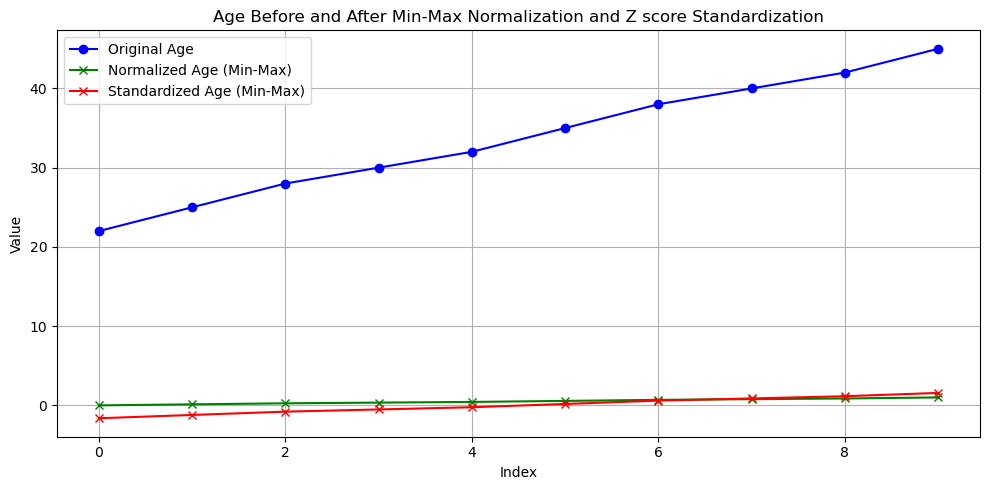

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_complete['age'].values, label='Original Age', marker='o', color='blue')
plt.plot(df_scaled['age'].values, label='Normalized Age (Min-Max)', marker='x', color='green')
plt.plot(df_standardized['age'].values, label='Standardized Age (Min-Max)', marker='x', color='red')
plt.title('Age Before and After Min-Max Normalization and Z score Standardization')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization of another feature (Salary) before and after scaling

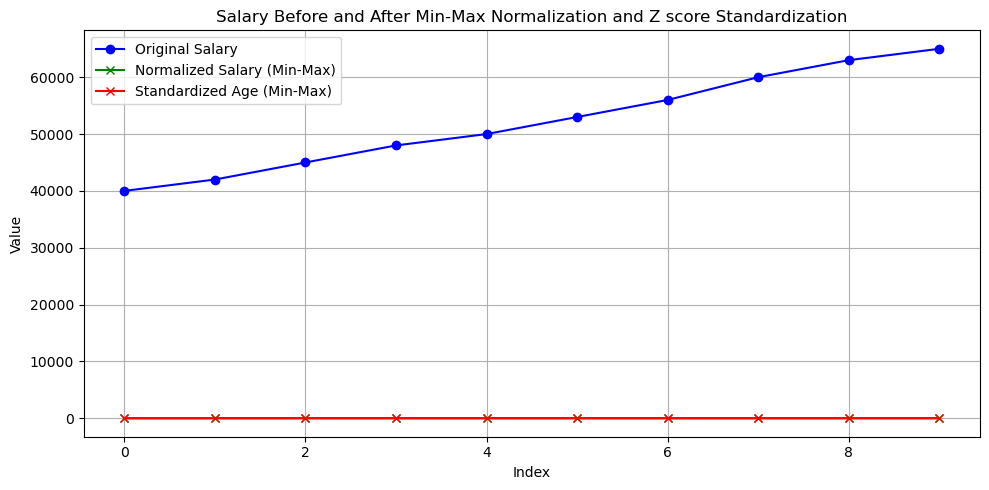

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_complete['salary'].values, label='Original Salary', marker='o', color='blue')
plt.plot(df_scaled['salary'].values, label='Normalized Salary (Min-Max)', marker='x', color='green')
plt.plot(df_standardized['salary'].values, label='Standardized Age (Min-Max)', marker='x', color='red')
plt.title('Salary Before and After Min-Max Normalization and Z score Standardization')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()